In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, make_scorer, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif

In [10]:
df = pd.DataFrame(data=pd.read_csv("/workspaces/linear-regression/data/medical_insurance_cost.csv"))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.shape

(1338, 7)

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df_numerical = df.select_dtypes(include=np.number)
df_numerical.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [20]:
df_categorical = df.select_dtypes(include="O")
df_categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [25]:
le = LabelEncoder()
df_cat_le = df_categorical.apply(le.fit_transform)
df_cat_le.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [27]:
df_le = pd.concat([df_numerical, df_cat_le],axis=1)
df_le.head()

,age,bmi,children,charges,sex,smoker,region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


<Axes: >

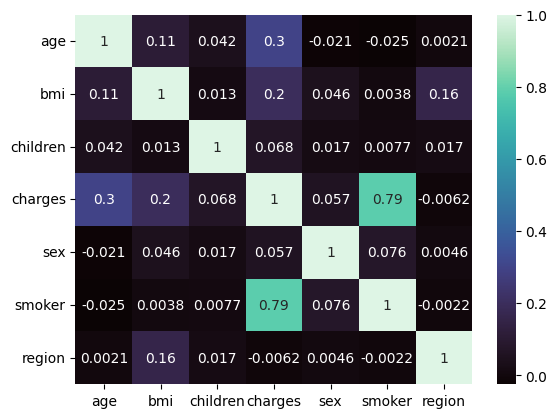

In [32]:
sns.heatmap(df_le.corr(), annot=True, cmap="mako")

<Axes: xlabel='charges', ylabel='age'>

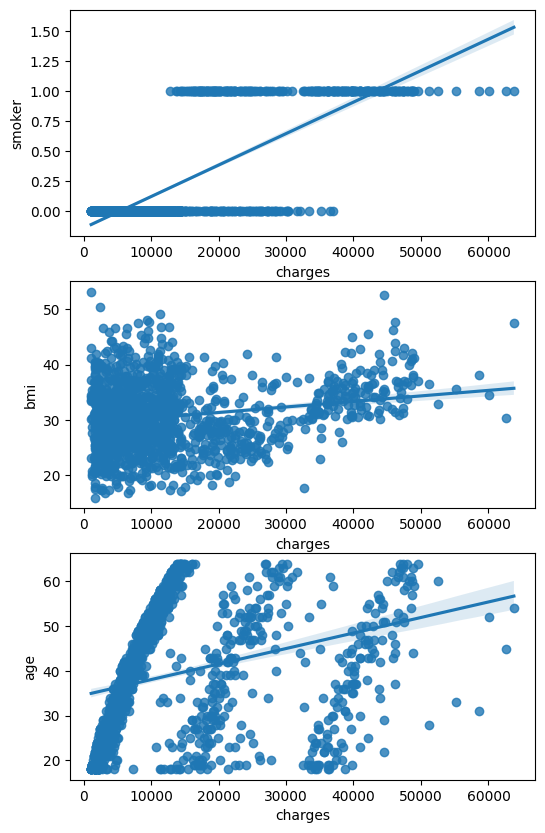

In [40]:
#We can see that the only 3 significant correlations for the charges column: smoker, bmi, and age
#Smoker is the stronger correlation (.79)

#Lets check the linear reggressions for those correlations

fix, axis = plt.subplots(3,1, figsize = (6,10))

sns.regplot(ax = axis[0], data = df_le, x = "charges", y = "smoker")
sns.regplot(ax = axis[1], data = df_le, x = "charges", y = "bmi")
sns.regplot(ax = axis[2], data = df_le, x = "charges", y = "age")


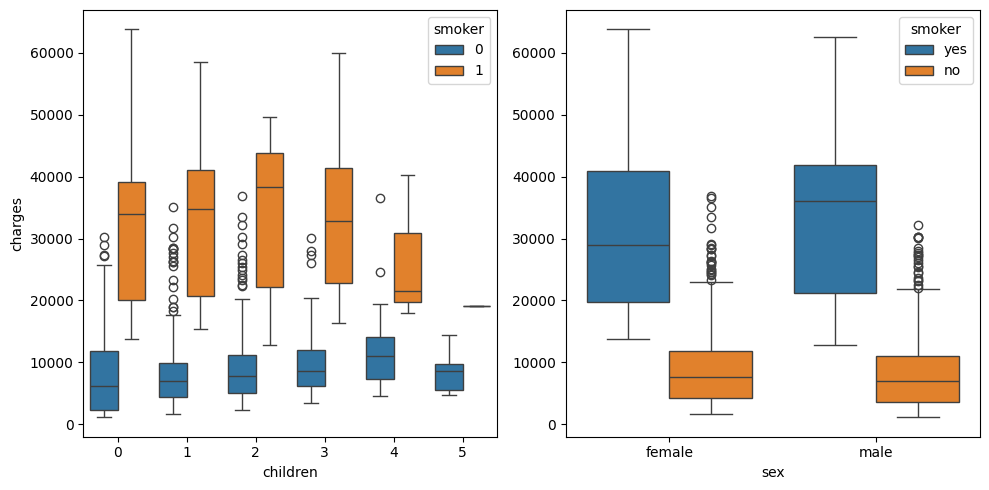

In [46]:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.boxplot(ax = axis[0], data = df_le, x = "children", y = "charges", hue = "smoker")
sns.boxplot(ax = axis[1], data = df, x = "sex", y = "charges", hue = "smoker").set(ylabel = None)

plt.tight_layout()

plt.show()

In [41]:
df_le.describe()

,age,bmi,children,charges,sex,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


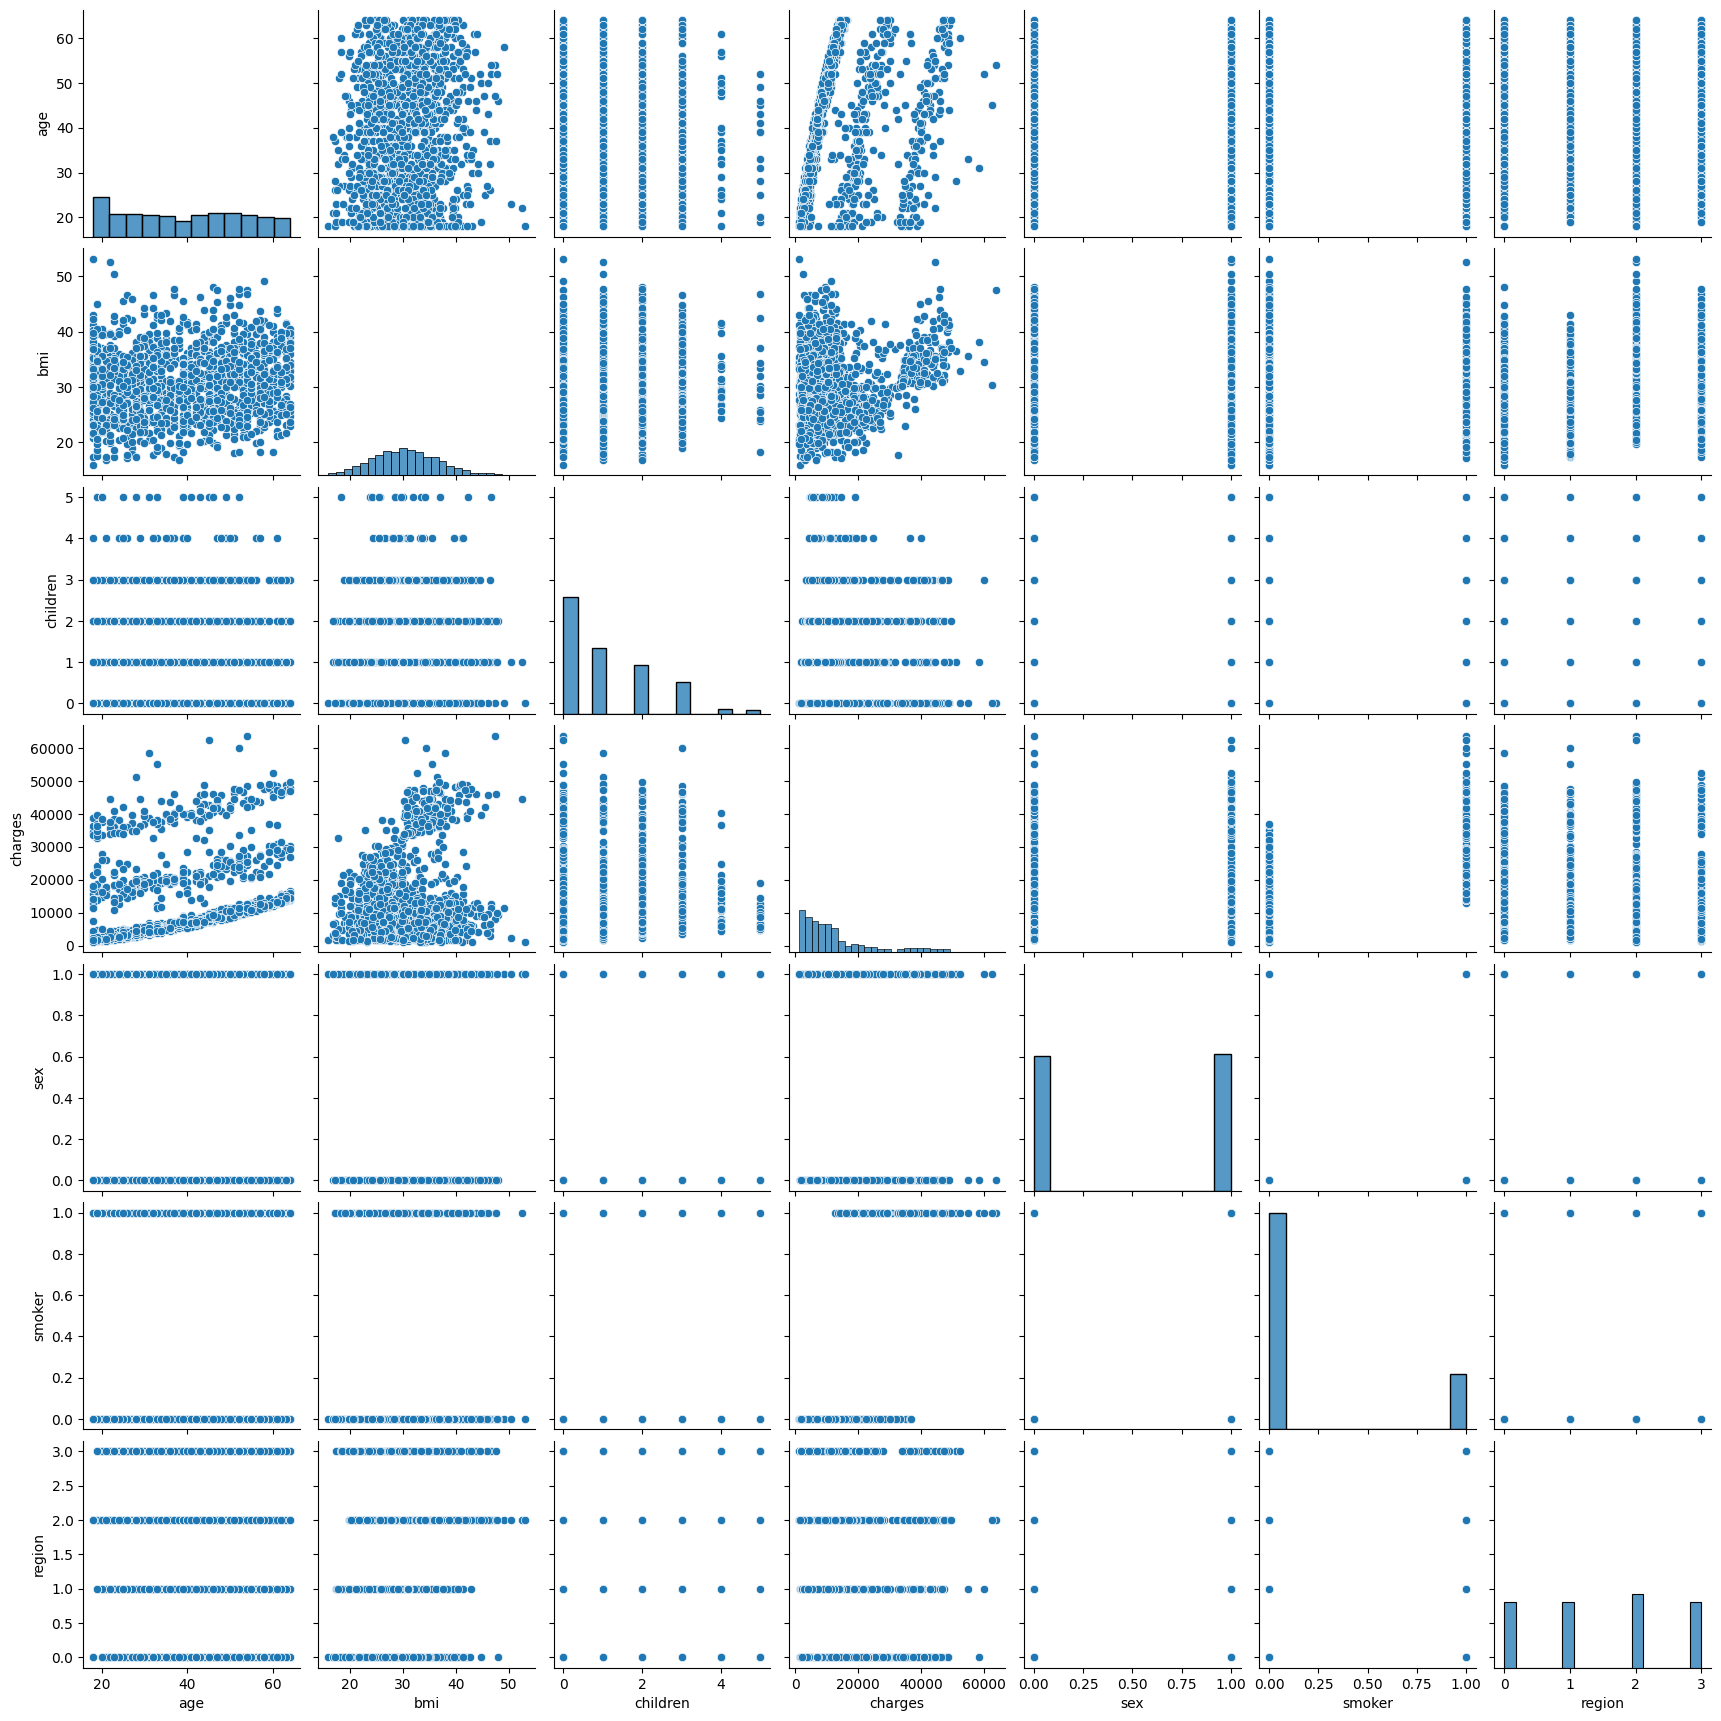

In [42]:
sns.pairplot(data=df_le)

In [47]:
#Lets train_test_split our model

X = df_le.drop("charges", axis=1)
y = df_le["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

<Axes: ylabel='Frequency'>

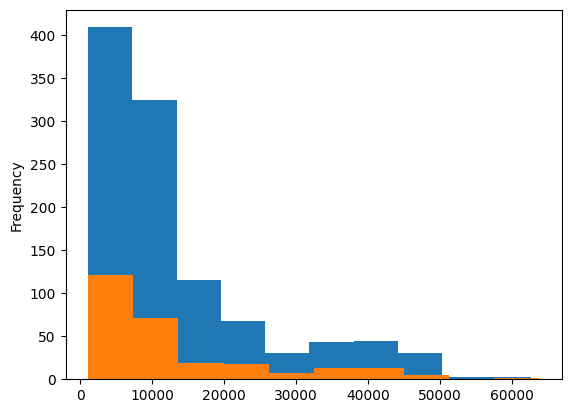

In [49]:
y_train.plot.hist()
y_test.plot.hist()

In [50]:
#Save train/test files to .csv

X_train.to_csv("X_Train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

In [54]:
#Feature Selection

selection_model = SelectKBest(f_classif, k = 6)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [55]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns=X_test.columns)

In [57]:
#Fitting the model

model = LinearRegression()
model.fit(X_train, y_train)

Training elapsed time:  0.009798663000765373


In [58]:
#Predictig charges from the model

y_pred = model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [59]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

33635210.43117841
0.7833463107364538
